In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y = bostonDF.PRICE
X = bostonDF.drop(columns=['PRICE'])

In [3]:
rf = RandomForestRegressor(1000,random_state=0)
neg_mse_scores = cross_val_score(rf,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
np.round(neg_mse_scores,2),np.round(rmse_scores,2),np.round(avg_rmse,2)

(array([ -7.88, -13.14, -20.57, -46.23, -18.88]),
 array([2.81, 3.63, 4.54, 6.8 , 4.34]),
 4.42)

In [4]:
def get_model_cv_prediction(model,X,y):
    neg_mse_scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('###',model.__class__.__name__,'###')
    print(f'교차검증 평균 RMSE : {avg_rmse:.3f}')

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
get_model_cv_prediction(dt_reg,X,y)

### DecisionTreeRegressor ###
교차검증 평균 RMSE : 5.978


In [7]:
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
get_model_cv_prediction(gb_reg,X,y)

### GradientBoostingRegressor ###
교차검증 평균 RMSE : 4.269


In [8]:
rf = RandomForestRegressor(1000,random_state=0)
rf.fit(X,y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [9]:
rf.feature_importances_

array([0.03937078, 0.00111554, 0.00568797, 0.00098457, 0.02301797,
       0.42660606, 0.01294374, 0.06578745, 0.00375848, 0.01470154,
       0.01713201, 0.01135876, 0.37753512])

<AxesSubplot:>

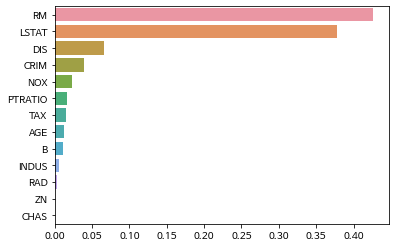

In [11]:
feature_series = pd.Series(rf.feature_importances_,X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)